# Visualizing Earnings Based on College Majors

## I. Introduction

In this project, we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).  

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:  

  * Rank - Rank by median earnings (the dataset is ordered by this column).
  * Major_code - Major code.
  * Major - Major description.
  * Major_category - Category of major.
  * Total - Total number of people with major.
  * Sample_size - Sample size (unweighted) of full-time.
  * Men - Male graduates.
  * Women - Female graduates.
  * ShareWomen - Women as share of total.
  * Employed - Number employed.
  * Median - Median salary of full-time, year-round workers.
  * Low_wage_jobs - Number in low-wage service jobs.
  * Full_time - Number employed 35 hours or more.
  * Part_time - Number employed less than 35 hours.  
  
Using visualizations, we can start to explore questions from the dataset like: 

  * Do students in more popular majors make more money?
    Using scatter plots
  * How many majors are predominantly male? Predominantly female?
    Using histograms
  * Which category of majors have the most students?
    Using bar plots

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [10]:
raw_data_count = recent_grads.shape[0]

In [11]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [12]:
recent_grads = recent_grads.dropna()

In [13]:
cleaned_data_count = recent_grads.shape[0]
print(raw_data_count)
print(cleaned_data_count)

173
172


## Pandas, Scatter Plots

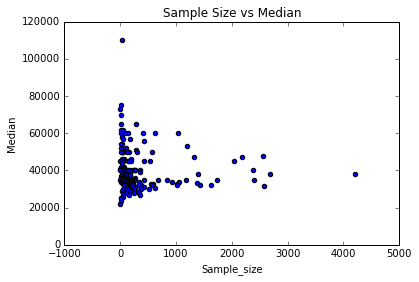

In [22]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax1.set_title('Sample Size vs Median')

Based on the plot above, we can deduced that most of the students who graduated typically earns 20,000 to 40,000 a year.

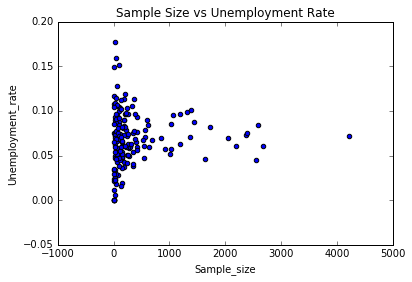

In [15]:
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax2.set_title('Sample Size vs Unemployment Rate')

Based on the plot above, most of the students after graduation fall into 5 to 10 percent unemployment rate.

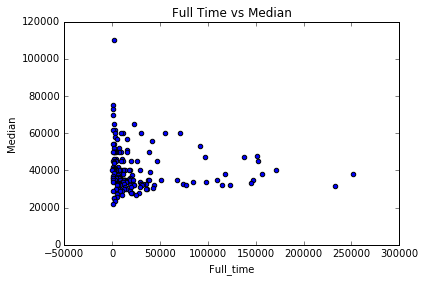

In [16]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax3.set_title('Full Time vs Median')

Based on the plot above, we can tell that after graduation most of the students with full time jobs typically fall just right above 20000 to 40000 a year category, we can say that there is not really much difference in salary in comparison with sample size.

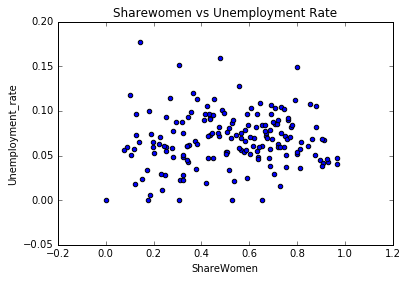

In [17]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax4.set_title('Sharewomen vs Unemployment Rate')

Based on the plot above, there is more divergence between the sharewomen and unemployment rate, meaning there is still discrimination in women working.

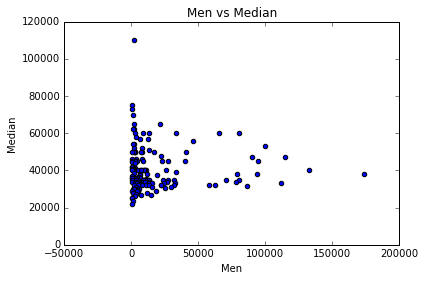

In [18]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax5.set_title('Men vs Median')

As we can see with the plotted details above, most of the men with jobs typically earns around 20,000 to 40,000 a year. 

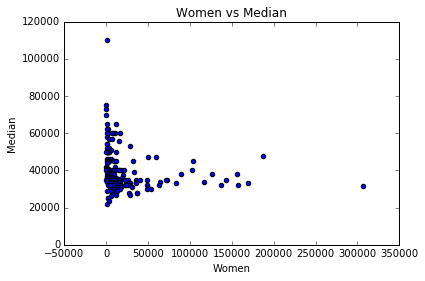

In [19]:
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax6.set_title('Women vs Median')

We can tell that graduate students who are female are not that able to enter the work force other than men, this proves the idea of gender inequality based on the graph sharewomen and unemployment rate.

## Pandas, Histogram

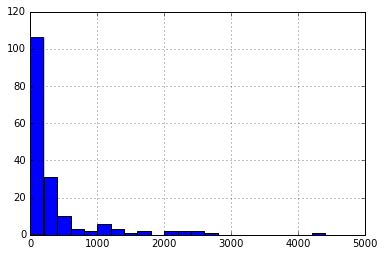

In [24]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

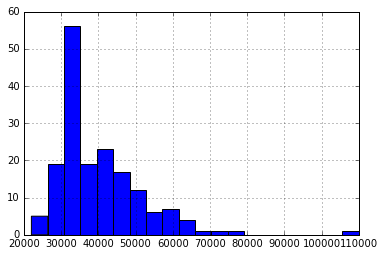

In [27]:
recent_grads['Median'].hist(bins=20)

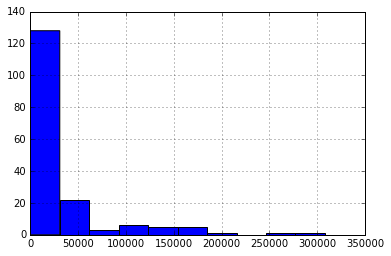

In [31]:
recent_grads['Employed'].hist()

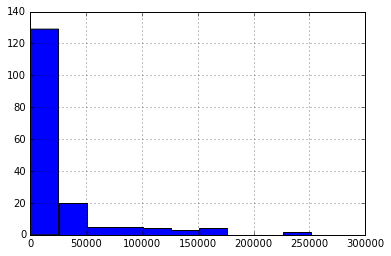

In [32]:
recent_grads['Full_time'].hist()

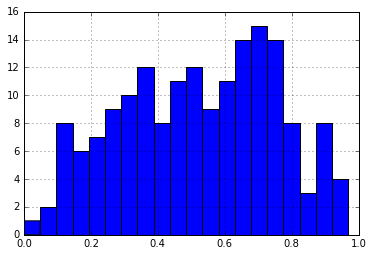

In [34]:
recent_grads['ShareWomen'].hist(bins=20)

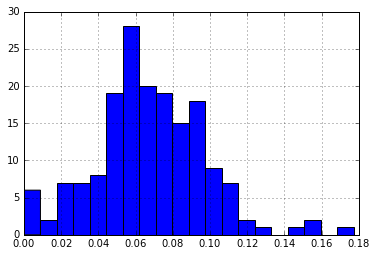

In [37]:
recent_grads['Unemployment_rate'].hist(bins=20)

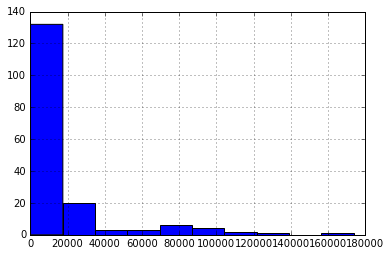

In [41]:
recent_grads['Men'].hist()

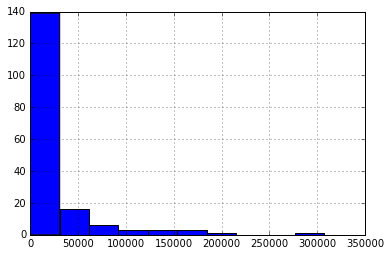

In [42]:
recent_grads['Women'].hist()

## Pandas, Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0644a446d8>,
      dtype=object)

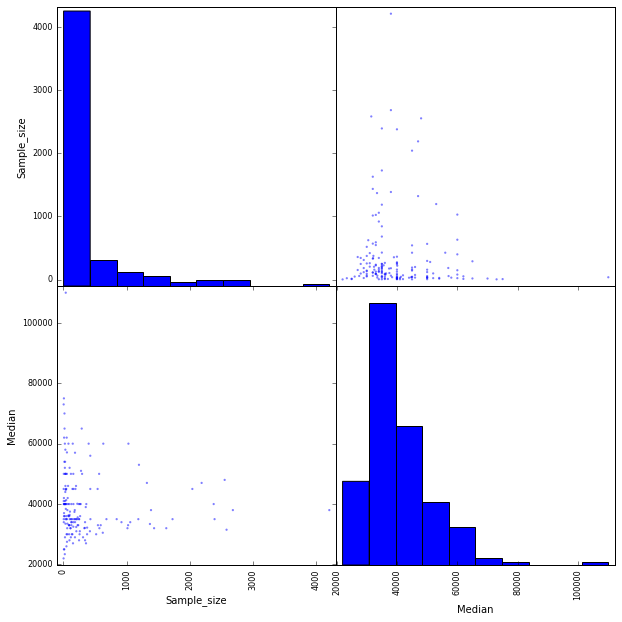

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f064494b080>,
      dtype=object)

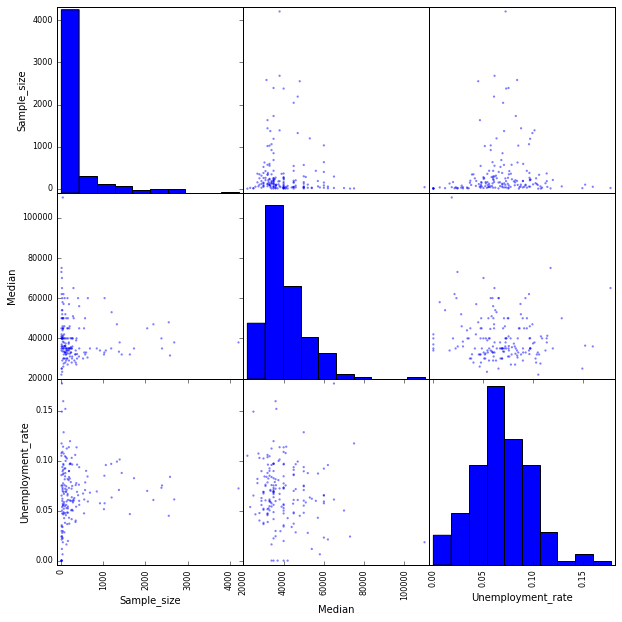

In [44]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(10,10))

## Pandas, Bar Plots

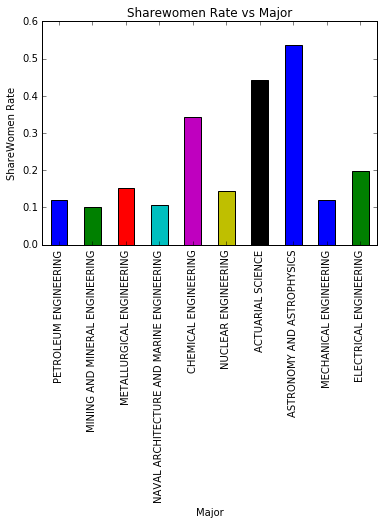

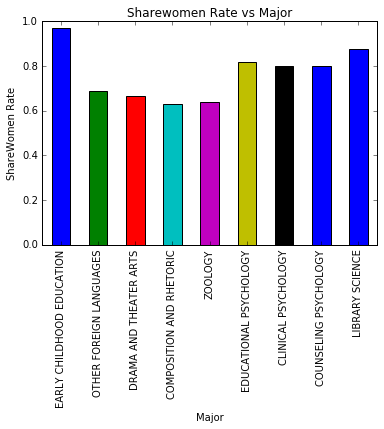

In [53]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
plt.ylabel('ShareWomen Rate')
plt.title('Sharewomen Rate vs Major')
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)
plt.ylabel('ShareWomen Rate')
plt.title('Sharewomen Rate vs Major')

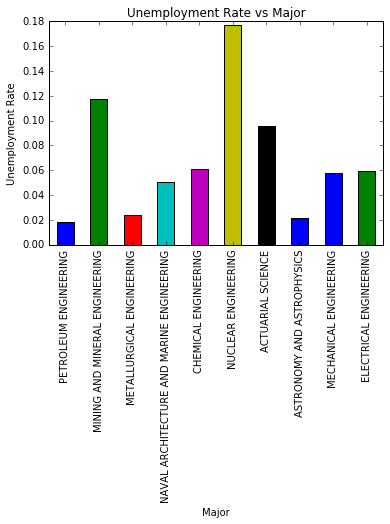

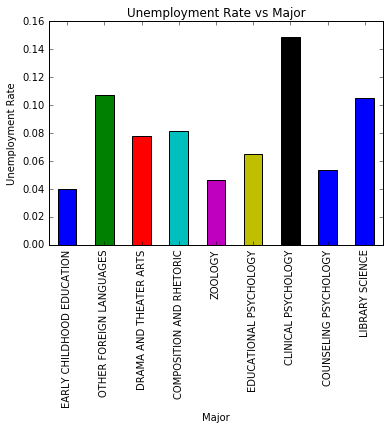

In [51]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate vs Major')
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate vs Major')